In [18]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
import numpy as np
import matplotlib.mlab as mlab
from IPython.display import clear_output
import matplotlib.pyplot as plt
import math

In [29]:
#bits, radius = 1000, 451
bits, radius = 256, 103

mu = bits/2 
sigma = bits**(1/2)/2
xlimstart = mu - 5*sigma


p = utils.calculate_probability(bits, radius)

sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
address_space.opencl_init();

In [30]:
p

0.0010668455863781202

In [31]:
counter = []

In [75]:
for i in range(10000):
    if i%100 == 0:
        clear_output(wait=True)
        print(i)
    bs = sdmlib.Bitstring.init_random(bits)
    result = address_space.scan_opencl2(bs, radius)
    for idx in result:
        bs2 = address_space.get_bitstring(idx)
        counter.append(bs.distance_to(bs2))

9900


In [84]:
from math import factorial
comb = lambda a, b: factorial(a)//factorial(b)//factorial(a-b)
acc = [0]
for i in range(radius+1):
    x = acc[-1] + 1.0 * comb(bits, i)
    acc.append(x)
    clear_output(wait=True)
    print (x)
#acc = acc[1:]

1.2353227934030306e+74


In [88]:
x = []
y = []
for d in range(radius+1):
    x.append(d)
    y.append(((1.0*comb(bits, d)) / (acc[radius])))
    print (d, x[d], y[d])

0 0 1.2444344684798716e-74
1 1 3.185752239308471e-72
2 2 4.061834105118301e-70
3 3 3.4390195423334947e-68
4 4 2.1751798605259355e-66
5 5 1.0962906497050714e-64
6 6 4.5861492179328823e-63
7 7 1.6379104349760292e-61
8 8 5.097996228862891e-60
9 9 1.4047811830644412e-58
10 10 3.46980952216917e-57
11 11 7.759755840487417e-56
12 12 1.584283484099514e-54
13 13 2.973578231694473e-53
14 14 5.161282216441121e-52
15 15 8.326868642525008e-51
16 16 1.2542345892803292e-49
17 17 1.7706841260428178e-48
18 18 2.351075034023519e-47
19 19 2.9450308320926186e-46
20 20 3.489861536029753e-45
21 21 3.9219396309667703e-44
22 22 4.189344605805413e-43
23 23 4.2622027728628987e-42
24 24 4.137888525321064e-41
25 25 3.839960551497948e-40
26 26 3.4116572592154846e-39
27 27 2.906226554146524e-38
28 28 2.3768781460698356e-37
29 29 1.868717990703181e-36
30 30 1.413996612965407e-35
31 31 1.0308491436457483e-34
32 32 7.248158041259168e-34
33 33 4.9199618219456173e-33
34 34 3.226916136158449e-32
35 35 2.046786806363359e-

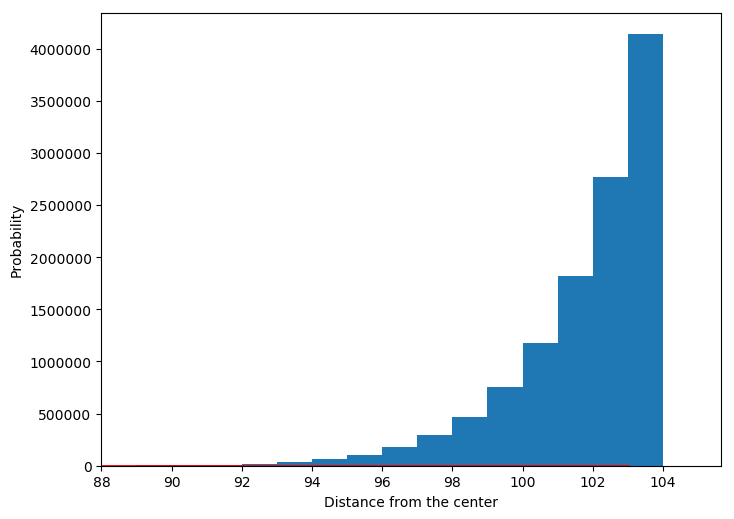

In [94]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(counter, range(0, radius+2)) #, density=True)
plt.plot(x, y, 'r', linewidth=2.0)
plt.xlim(xlimstart, radius+sigma/3)
plt.ylabel('Probability')
plt.xlabel('Distance from the center')
plt.show()

In [79]:
from math import log
I = [-log(p)/log(2) if p > 0 else 0 for p in y]

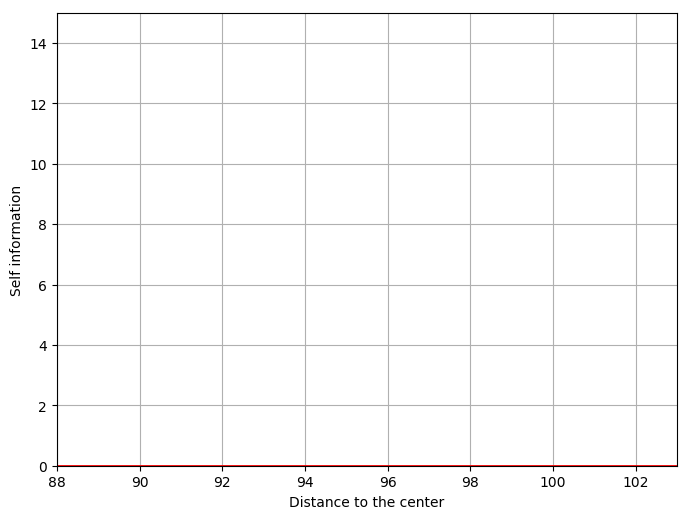

In [80]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, I, 'r', linewidth=2.0)
plt.xlim(xlimstart, radius)
plt.ylim(0, 15)
plt.ylabel('Self information')
plt.xlabel('Distance to the center')
plt.grid()
plt.show()

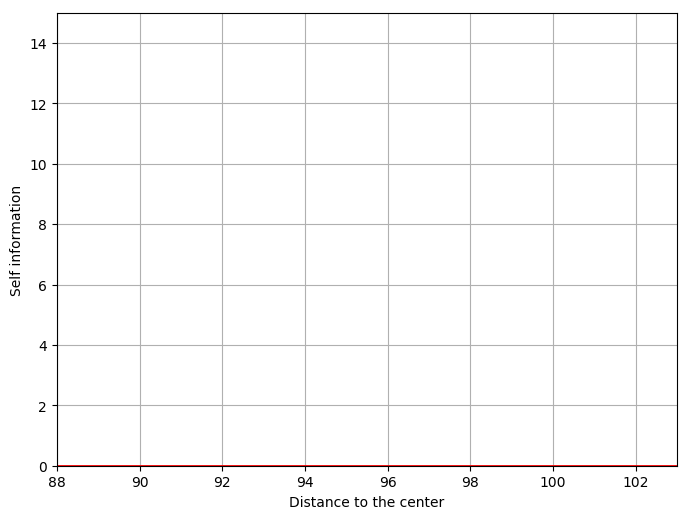

In [81]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, [int(p) for p in I], 'r', linewidth=2.0)
plt.xlim(xlimstart, radius)
plt.ylim(0, 15)
plt.ylabel('Self information')
plt.xlabel('Distance to the center')
plt.grid()
plt.show()

In [59]:
I[-1]

1.516636953396966

In [61]:
1.0*int(I[420]) / int(I[-1])

IndexError: list index out of range

In [53]:
repr([int(p) for p in I])

'[246, 238, 231, 224, 218, 213, 207, 202, 197, 192, 188, 183, 179, 175, 170, 166, 163, 159, 155, 151, 148, 144, 141, 138, 134, 131, 128, 125, 122, 119, 116, 113, 110, 107, 105, 102, 99, 97, 94, 92, 89, 87, 85, 82, 80, 78, 76, 73, 71, 69, 67, 65, 63, 61, 59, 58, 56, 54, 52, 50, 49, 47, 45, 44, 42, 40, 39, 37, 36, 35, 33, 32, 30, 29, 28, 26, 25, 24, 23, 22, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 10, 9, 8, 7, 6, 6, 5, 4, 3, 3, 2, 2, 1]'